## Getting Started

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

pd.set_option('display.max_columns', 200)

In [2]:
# Data cleaning: standardization, missing data done on the cheap outside of the Python environment

In [3]:
survey_df_raw = pd.read_csv(filepath_or_buffer='chadev_survey_cleaned.csv', true_values=['Yes'], false_values=['No'], na_values=['-1'])

In [4]:
survey_df_raw.tail()

,Timestamp,YEARS_EXP,NUM_HOURS_WORK,DES_NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,HEALTH_INS_PCT,STACK,COMP_MEALS,CONF_BUDGET,PAID_LUNCH_HOUR,PUBLIC_SPEAKING,FREE_TESLA,401K,TRAINING_BUDGET,RIGHT_LEFT_BRAIN,BOOKS_READ,HIGH_SCHOOL,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT
62,12/12/2015 23:22:47,11.0,45,35,20,115000,250,True,80,.net; JavaScript; Linux; Clojure; Java; Csharp...,4,5000,True,True,True,True,True,True,20,True,True,True,5
63,12/13/2015 15:11:48,12.0,45,45,15,95000,10,True,90,NaN,2,0,True,True,True,True,True,True,50,True,True,True,6
64,12/13/2015 16:44:02,7.0,30,0,0,96000,1,False,0,Postgres; Node; Rails.js; Xcode; Android; Java...,0,2000,False,True,True,False,False,True,16,True,False,False,4
65,12/15/2015 13:18:14,0.5,40,30,12,40000,1,True,NaN,NaN,0,0,True,False,True,False,False,False,4,True,True,True,1
66,1/4/2016 13:18:12,2.0,40,40,10,30000,10,False,0,Angular; MySQL; Javascript,0,0,False,False,True,False,False,True,3,True,False,False,2


In [5]:
# Binning: Categorize company size by number of employees

In [6]:
def companySizeCat(numEmployees):
    if numEmployees < 7: # micro
        return 1
    elif numEmployees < 250: # small
        return 2
    elif numEmployees < 500: # medium
        return 3
    elif numEmployees < 1000: # large
        return 4
    else: # enterprise
        return 5 

In [7]:
survey_df_raw['COMP_SIZE'] = survey_df_raw['COMP_SIZE'].apply(lambda x: companySizeCat(x))

In [8]:
survey_df_raw.head()

,Timestamp,YEARS_EXP,NUM_HOURS_WORK,DES_NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,HEALTH_INS_PCT,STACK,COMP_MEALS,CONF_BUDGET,PAID_LUNCH_HOUR,PUBLIC_SPEAKING,FREE_TESLA,401K,TRAINING_BUDGET,RIGHT_LEFT_BRAIN,BOOKS_READ,HIGH_SCHOOL,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT
0,9/4/2015 23:08:05,5,35,32,20,70000,1,True,100,rails; angular; javascript; ruby,4,0,True,False,True,False,False,True,0,True,True,True,8
1,9/4/2015 23:56:55,10,40,30,0,120000,1,False,0,linux; apache; mysql; php; lemp; javascript; f...,4,3000,True,True,True,False,True,False,3,True,False,False,6
2,9/5/2015 0:34:15,11,45,40,15,75000,2,True,25,.NET; Puppet; Java; Windows; Debian; Node; Jav...,0,0,False,False,True,False,False,False,2,True,True,True,6
3,9/5/2015 8:36:17,6,40,20,16,77000,2,True,50,Linux; PHP; Nginx; Postgresql,0,0,True,False,True,False,False,False,10,True,True,True,3
4,9/5/2015 12:07:20,6,50,60,14,70000,2,True,80,Ruby; Rails; PHP; Magento; Nginx; Linux; OSX,0,0,False,False,True,False,False,False,3,True,False,False,3


In [9]:
# Drop columns that don't give any particular insight (subjectively chosen)

In [10]:
survey_df_raw.drop(['Timestamp', 'DES_NUM_HOURS_WORK', 'HEALTH_INS_PCT', 'PAID_LUNCH_HOUR', 
                    'PUBLIC_SPEAKING', 'FREE_TESLA', 'RIGHT_LEFT_BRAIN', 'HIGH_SCHOOL'], axis=1, inplace=True);

In [11]:
survey_df_raw.columns

Index([u'YEARS_EXP', u'NUM_HOURS_WORK', u'DAYS_OFF', u'SALARY', u'COMP_SIZE',
       u'HEALTH_INS', u'STACK', u'COMP_MEALS', u'CONF_BUDGET', u'401K',
       u'TRAINING_BUDGET', u'BOOKS_READ', u'DEGREE', u'CAREER_DEGREE',
       u'WORK_HIST_COUNT'],
      dtype='object')

In [12]:
# Let's try to understand the data

In [13]:
survey_df_raw.describe()

,YEARS_EXP,NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,COMP_MEALS,CONF_BUDGET,401K,TRAINING_BUDGET,BOOKS_READ,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT
count,67.000000,67.000000,67.000000,67.000000,67.000000,67,67.000000,67.000000,67,67,67.000000,67,67,67.000000
mean,9.305970,43.044776,21.059701,82020.149254,2.492537,0.880597,1.343284,5302.238806,0.6268657,0.3731343,8.828358,0.7761194,0.6119403,5.328358
std,7.335032,6.883077,16.737619,28621.548435,1.172580,0.3267094,2.421821,27144.660774,0.4872875,0.4872875,10.460804,0.419989,0.4909861,4.247595
min,0.500000,20.000000,0.000000,20000.000000,1.000000,False,0.000000,0.000000,False,False,0.000000,False,False,1.000000
25%,4.000000,40.000000,14.000000,65000.000000,2.000000,1,0.000000,0.000000,0,0,2.500000,1,0,3.000000
50%,7.000000,40.000000,20.000000,77000.000000,2.000000,1,0.000000,0.000000,1,0,5.000000,1,1,4.000000
75%,12.000000,47.000000,23.500000,95000.000000,3.000000,1,2.000000,475.000000,1,1,10.000000,1,1,6.000000
max,30.000000,65.000000,100.000000,185000.000000,5.000000,True,10.000000,200000.000000,True,True,50.000000,True,True,27.000000



## Now on to questions

### Question 1: What is the most common company size, years of experience, number of jobs, number of books read, salary

In [14]:
sel_columns_df = survey_df_raw[['COMP_SIZE','YEARS_EXP', 'WORK_HIST_COUNT', 'BOOKS_READ', 'SALARY']]
sel_columns_df.mode()

,COMP_SIZE,YEARS_EXP,WORK_HIST_COUNT,BOOKS_READ,SALARY
0,2,10,3,3,75000
1,NaN,NaN,4,NaN,NaN



### Question 2: What are the most common stack tools?

To answer this we need to first vectorize the free-text in the stack

In [15]:
# Define a function to tokenize the raw text entered by the users 
def tokenizr(text):
    tokens = text.split(";");
    return [ token.strip() for token in tokens if token.isspace() == False ]
    

In [16]:
# Vectorize the text using sklearn provided CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tools = survey_df_raw['STACK'];
tools.fillna('', inplace=True);

tf_vectorizer = CountVectorizer(tokenizer=tokenizr);
tools_matrix = tf_vectorizer.fit_transform(tools);

In [17]:
# Produces a matrix
tools_matrix.shape

(67, 161)

In [18]:
tf_vectorizer.get_feature_names()

[u'',
 u'.net',
 u'airflow',
 u'android',
 u'anger',
 u'angular',
 u'ansible',
 u'apache',
 u'apex',
 u'asp .net',
 u'asp mvc',
 u'atom',
 u'aws',
 u'baby bottles & burping cloths.',
 u'bash',
 u'bootstrap',
 u'brainpower',
 u'c++',
 u'centos',
 u'chairs',
 u'classic asp',
 u'clojure',
 u'cognos',
 u'computers',
 u'consul',
 u'csharp',
 u'css',
 u'css3',
 u'db2 for z/os',
 u'db2 luw',
 u'debian',
 u'digitalocean',
 u'divshot',
 u'django',
 u'docker',
 u'drupal',
 u'ec2',
 u'eclipse ide',
 u'elasticache',
 u'elasticsearch',
 u'elixir',
 u'ember',
 u'es6',
 u'excel',
 u'express',
 u'express.js',
 u'flask',
 u'flux',
 u'force.com platform',
 u'fsharp',
 u'giphy',
 u'git',
 u'github',
 u'go',
 u'google',
 u'google docs',
 u'google drive',
 u'google hangouts',
 u'gotomeeting',
 u'graphite',
 u'gulp',
 u'hand tools',
 u'hate',
 u'heroku',
 u'hipchat',
 u'hl7',
 u'html',
 u'html5',
 u'iis',
 u'ims',
 u'internet',
 u'java',
 u'javascript',
 u'jekyll',
 u'jenkins',
 u'jira',
 u'jquery',
 u'jrub

In [19]:
# Turn the matrix into a dataframe
tools_matrix_df = DataFrame(data=tools_matrix.toarray(), columns=tf_vectorizer.get_feature_names())

# Join the dataframe to the survey data frame
survey_df_wTM = survey_df_raw.join(tools_matrix_df)
survey_df_wTM.drop(['STACK'], axis=1, inplace=True)

# visualize
survey_df_wTM.head()

,YEARS_EXP,NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,COMP_MEALS,CONF_BUDGET,401K,TRAINING_BUDGET,BOOKS_READ,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT,,.net,airflow,android,anger,angular,ansible,apache,apex,asp .net,asp mvc,atom,aws,baby bottles & burping cloths.,bash,bootstrap,brainpower,c++,centos,chairs,classic asp,clojure,cognos,computers,consul,csharp,css,css3,db2 for z/os,db2 luw,debian,digitalocean,divshot,django,docker,drupal,ec2,eclipse ide,elasticache,elasticsearch,elixir,ember,es6,excel,express,express.js,flask,flux,force.com platform,fsharp,giphy,git,github,go,google,google docs,google drive,google hangouts,gotomeeting,graphite,gulp,hand tools,hate,heroku,hipchat,hl7,html,html5,iis,ims,internet,java,javascript,jekyll,jenkins,jira,jquery,jruby,keras,kibana,knockout,knockout.js,kubernetes,lasers,lemp,line scan cameras,linux,magento,mercurial,mesos,microsoft,mongodb,mssql,mysql,netezza,nginx,node,obj c,oracle,osx,outlook,perl,phone,php,plc/mlc,postgres,postgresql,power tools,powershell,puppet,python,rabbitmq,rackspace,rails,rails.js,rds,react,redis,redshift,redux,rhel,ruby,s3,sails,salesforce,sass,scikit-learn,scss,segment.io,selenium,server 2012,sinatra,skype,slack,sql,sql server,ssh,stack overflow,sublime text,surreal.cms,swift,teamcity,teradata,terminals,torquebox,ubuntu,vagrant,vb,vba,vero,vim,visual studio,visual studio 2012,vmware,windows,windows batch files,windows server,wordpress,wp,xcode,xslt
0,5,35,20,70000,1,True,4,0,False,False,0,True,True,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,40,0,120000,1,False,4,3000,False,True,3,False,False,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11,45,15,75000,2,True,0,0,False,False,2,True,True,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,6,40,16,77000,2,True,0,0,False,False,10,True,True,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,50,14,70000,2,True,0,0,False,False,3,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Get the most mentioned stack tools by summing the values of the tools_matrix_df
# Results show we have a very webby crowd (or at the very least, lots of full-stack developers)
X = tools_matrix_df.sum()

X.sort(ascending=False)
X.head(10)

javascript    39
linux         23
node          22
ruby          22
rails         19
postgres      19
nginx         16
php           15
mysql         14
angular       12
dtype: int64


### Question 3: Are there commonalities in groups of responders that machine learning can sniff out on our behalf?

Cluster the survey responses together to see if there are common groups of responders. See what the characteristics of those groups are.

In [21]:
# Using a basic KMeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=500)

# Attempt 1: Just give it all the data in its raw, naked glory and see what it comes up with
kmeans.fit(survey_df_wTM)
kmeans.labels_

array([0, 1, 0, 0, 0, 3, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2,
       4, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 0, 0, 0,
       3, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 0, 3, 1, 1, 0, 0, 3, 3], dtype=int32)

In [22]:
# Taking a look at what records were assigned to what cluster, I notice a disturbing trend: Salary is outweighing 
#   all other features
survey_df_c1 = survey_df_wTM.copy()
survey_df_c1.insert(0, 'CLUSTER1_LABEL', kmeans.labels_)
survey_df_c1.head(10)

,CLUSTER1_LABEL,YEARS_EXP,NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,COMP_MEALS,CONF_BUDGET,401K,TRAINING_BUDGET,BOOKS_READ,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT,,.net,airflow,android,anger,angular,ansible,apache,apex,asp .net,asp mvc,atom,aws,baby bottles & burping cloths.,bash,bootstrap,brainpower,c++,centos,chairs,classic asp,clojure,cognos,computers,consul,csharp,css,css3,db2 for z/os,db2 luw,debian,digitalocean,divshot,django,docker,drupal,ec2,eclipse ide,elasticache,elasticsearch,elixir,ember,es6,excel,express,express.js,flask,flux,force.com platform,fsharp,giphy,git,github,go,google,google docs,google drive,google hangouts,gotomeeting,graphite,gulp,hand tools,hate,heroku,hipchat,hl7,html,html5,iis,ims,internet,java,javascript,jekyll,jenkins,jira,jquery,jruby,keras,kibana,knockout,knockout.js,kubernetes,lasers,lemp,line scan cameras,linux,magento,mercurial,mesos,microsoft,mongodb,mssql,mysql,netezza,nginx,node,obj c,oracle,osx,outlook,perl,phone,php,plc/mlc,postgres,postgresql,power tools,powershell,puppet,python,rabbitmq,rackspace,rails,rails.js,rds,react,redis,redshift,redux,rhel,ruby,s3,sails,salesforce,sass,scikit-learn,scss,segment.io,selenium,server 2012,sinatra,skype,slack,sql,sql server,ssh,stack overflow,sublime text,surreal.cms,swift,teamcity,teradata,terminals,torquebox,ubuntu,vagrant,vb,vba,vero,vim,visual studio,visual studio 2012,vmware,windows,windows batch files,windows server,wordpress,wp,xcode,xslt
0,0,5,35,20,70000,1,True,4,0,False,False,0,True,True,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,10,40,0,120000,1,False,4,3000,False,True,3,False,False,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,11,45,15,75000,2,True,0,0,False,False,2,True,True,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,6,40,16,77000,2,True,0,0,False,False,10,True,True,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,6,50,14,70000,2,True,0,0,False,False,3,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,2,50,14,45000,1,False,0,0,False,True,4,True,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,0,16,50,15,93550,3,True,0,350,True,True,22,True,True,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
survey_df_c1.tail(10)

,CLUSTER1_LABEL,YEARS_EXP,NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,COMP_MEALS,CONF_BUDGET,401K,TRAINING_BUDGET,BOOKS_READ,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT,,.net,airflow,android,anger,angular,ansible,apache,apex,asp .net,asp mvc,atom,aws,baby bottles & burping cloths.,bash,bootstrap,brainpower,c++,centos,chairs,classic asp,clojure,cognos,computers,consul,csharp,css,css3,db2 for z/os,db2 luw,debian,digitalocean,divshot,django,docker,drupal,ec2,eclipse ide,elasticache,elasticsearch,elixir,ember,es6,excel,express,express.js,flask,flux,force.com platform,fsharp,giphy,git,github,go,google,google docs,google drive,google hangouts,gotomeeting,graphite,gulp,hand tools,hate,heroku,hipchat,hl7,html,html5,iis,ims,internet,java,javascript,jekyll,jenkins,jira,jquery,jruby,keras,kibana,knockout,knockout.js,kubernetes,lasers,lemp,line scan cameras,linux,magento,mercurial,mesos,microsoft,mongodb,mssql,mysql,netezza,nginx,node,obj c,oracle,osx,outlook,perl,phone,php,plc/mlc,postgres,postgresql,power tools,powershell,puppet,python,rabbitmq,rackspace,rails,rails.js,rds,react,redis,redshift,redux,rhel,ruby,s3,sails,salesforce,sass,scikit-learn,scss,segment.io,selenium,server 2012,sinatra,skype,slack,sql,sql server,ssh,stack overflow,sublime text,surreal.cms,swift,teamcity,teradata,terminals,torquebox,ubuntu,vagrant,vb,vba,vero,vim,visual studio,visual studio 2012,vmware,windows,windows batch files,windows server,wordpress,wp,xcode,xslt
57,1,10.0,45,25,115000,4,True,4,0,True,False,12,True,True,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,1,10.0,40,25,120000,2,True,0,0,False,False,3,False,False,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59,0,5.0,40,15,80000,2,True,0,0,False,False,5,True,True,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,3,2.0,40,20,65000,2,True,2,0,False,False,10,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,1,20.0,35,45,185000,5,True,0,20000,True,True,15,True,False,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,1,11.0,45,20,115000,3,True,4,5000,True,True,20,True,True,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,0,12.0,45,15,95000,2,True,2,0,True,True,50,True,True,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [24]:
# To prove that out a bit more I group by the cluster label and run some stats
cl1_groups = survey_df_c1.groupby(['CLUSTER1_LABEL'])
cl1_groups.agg([np.mean, np.min, np.max, np.std])

YEARS_EXP                     NUM_HOURS_WORK            \
                     mean amin amax       std           mean amin amax   
CLUSTER1_LABEL                                                           
0               10.333333  1.0   30  7.030546      43.444444   30   60   
1               12.833333  4.0   30  6.939129      39.583333   20   50   
2                9.000000  9.0    9       NaN      40.000000   40   40   
3                5.147059  0.5   28  6.804789      44.705882   40   65   
4                1.000000  1.0    1       NaN      45.000000   45   45   

                           DAYS_OFF                       SALARY          \
                     std       mean amin amax        std    mean    amin   
CLUSTER1_LABEL                                                             
0               6.591962  21.638889    0  100  20.077212   82586   68000   
1               7.216878  22.666667    0   45  10.620164  126666  105000   
2                    NaN  25.000000   25   25        NaN   90000   90000   
3               7.174301  18.235294    0   60  13.534813   50426   20000   
4                    NaN  25.000000   25   25        NaN   55000   55000   

                                     COMP_SIZE                     HEALTH_INS  \
                  amax           std      mean amin amax       std       mean   
CLUSTER1_LABEL                                                                  
0               100000   9938.867506  2.333333    1    5  0.925820   0.916667   
1               185000  24058.010699  3.083333    1    5  1.443376   0.916667   
2                90000           NaN  2.000000    2    2       NaN   1.000000   
3                65000  12621.832742  2.470588    1    5  1.419403   0.764706   
4                55000           NaN  2.000000    2    2       NaN   1.000000   

                                      COMP_MEALS                      \
                 amin  amax       std       mean amin amax       std   
CLUSTER1_LABEL                                                         
0               False  True  0.280306   0.861111    0    8  1.709683   
1               False  True  0.288675   2.083333    0    8  2.778434   
2                True  True       NaN   1.000000    1    1       NaN   
3               False  True  0.437237   1.411765    0   10  2.807553   
4                True  True       NaN   9.000000    9    9       NaN   

                  CONF_BUDGET                                   401K         \
                         mean    amin    amax          std      mean   amin   
CLUSTER1_LABEL                                                                
0                  423.611111       0    5000  1008.711067  0.638889  False   
1                 3125.000000       0   20000  5657.356434  0.750000  False   
2               200000.000000  200000  200000          NaN  0.000000  False   
3                  147.058824       0    1500   424.437344  0.588235  False   
4               100000.000000  100000  100000          NaN  0.000000  False   

                                TRAINING_BUDGET                          \
                 amax       std            mean   amin   amax       std   
CLUSTER1_LABEL                                                            
0                True  0.487136        0.305556  False   True  0.467177   
1                True  0.452267        0.583333  False   True  0.514929   
2               False       NaN        0.000000  False  False       NaN   
3                True  0.507300        0.352941  False   True  0.492592   
4               False       NaN        1.000000   True   True       NaN   

               BOOKS_READ                         DEGREE               \
                     mean amin amax        std      mean   amin  amax   
CLUSTER1_LABEL                                                          
0                9.833333    0   50  12.190160  0.833333  False  True   
1                7.583333    1   20   5.869154  0.500000  Fals

In [25]:
# But what if I wanted to stop salary from outweighing the other features so that the algorithm can consider ALL
#   features in its clustering decision?

def normalize(df, columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [26]:
# apply it to...
survey_df_normalized = normalize(survey_df_raw, ['YEARS_EXP', 'NUM_HOURS_WORK', 'DAYS_OFF', 'SALARY', 'CONF_BUDGET', 'BOOKS_READ', 'WORK_HIST_COUNT'])
survey_df_normalized.drop(['STACK', 'COMP_MEALS'], axis=1, inplace=True)
survey_df_normalized.head(10)

,YEARS_EXP,NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,CONF_BUDGET,401K,TRAINING_BUDGET,BOOKS_READ,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT
0,0.152542,0.333333,0.20,0.303030,1,True,0.00000,False,False,0.00,True,True,0.269231
1,0.322034,0.444444,0.00,0.606061,1,False,0.01500,False,True,0.06,False,False,0.192308
2,0.355932,0.555556,0.15,0.333333,2,True,0.00000,False,False,0.04,True,True,0.192308
3,0.186441,0.444444,0.16,0.345455,2,True,0.00000,False,False,0.20,True,True,0.076923
4,0.186441,0.666667,0.14,0.303030,2,True,0.00000,False,False,0.06,False,False,0.076923
5,0.050847,0.666667,0.14,0.151515,1,False,0.00000,False,True,0.08,True,False,0.000000
6,0.525424,0.666667,0.15,0.445758,3,True,0.00175,True,True,0.44,True,True,0.307692
7,0.016949,0.444444,0.60,0.181818,1,False,0.00000,True,False,0.48,True,False,0.153846
8,0.593220,0.666667,0.30,0.666667,5,True,0.00000,True,False,0.20,False,False,0.076923
9,1.000000,0.000000,0.20,0.606061,2,True,0.02500,True,True,0.20,False,False,0.730769


In [27]:
kmeans.fit(survey_df_normalized)

survey_df_c2 = survey_df_wTM.copy()
survey_df_c2.insert(0, 'CLUSTER2_LABEL', kmeans.labels_)
survey_df_c2.head(10)

,CLUSTER2_LABEL,YEARS_EXP,NUM_HOURS_WORK,DAYS_OFF,SALARY,COMP_SIZE,HEALTH_INS,COMP_MEALS,CONF_BUDGET,401K,TRAINING_BUDGET,BOOKS_READ,DEGREE,CAREER_DEGREE,WORK_HIST_COUNT,,.net,airflow,android,anger,angular,ansible,apache,apex,asp .net,asp mvc,atom,aws,baby bottles & burping cloths.,bash,bootstrap,brainpower,c++,centos,chairs,classic asp,clojure,cognos,computers,consul,csharp,css,css3,db2 for z/os,db2 luw,debian,digitalocean,divshot,django,docker,drupal,ec2,eclipse ide,elasticache,elasticsearch,elixir,ember,es6,excel,express,express.js,flask,flux,force.com platform,fsharp,giphy,git,github,go,google,google docs,google drive,google hangouts,gotomeeting,graphite,gulp,hand tools,hate,heroku,hipchat,hl7,html,html5,iis,ims,internet,java,javascript,jekyll,jenkins,jira,jquery,jruby,keras,kibana,knockout,knockout.js,kubernetes,lasers,lemp,line scan cameras,linux,magento,mercurial,mesos,microsoft,mongodb,mssql,mysql,netezza,nginx,node,obj c,oracle,osx,outlook,perl,phone,php,plc/mlc,postgres,postgresql,power tools,powershell,puppet,python,rabbitmq,rackspace,rails,rails.js,rds,react,redis,redshift,redux,rhel,ruby,s3,sails,salesforce,sass,scikit-learn,scss,segment.io,selenium,server 2012,sinatra,skype,slack,sql,sql server,ssh,stack overflow,sublime text,surreal.cms,swift,teamcity,teradata,terminals,torquebox,ubuntu,vagrant,vb,vba,vero,vim,visual studio,visual studio 2012,vmware,windows,windows batch files,windows server,wordpress,wp,xcode,xslt
0,2,5,35,20,70000,1,True,4,0,False,False,0,True,True,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,10,40,0,120000,1,False,4,3000,False,True,3,False,False,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,11,45,15,75000,2,True,0,0,False,False,2,True,True,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,6,40,16,77000,2,True,0,0,False,False,10,True,True,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,6,50,14,70000,2,True,0,0,False,False,3,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,2,50,14,45000,1,False,0,0,False,True,4,True,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,4,16,50,15,93550,3,True,0,350,True,True,22,True,True,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
# Fixed! But there is a new problem. I don't know what these clusters mean because there are too many dimensions
#   for me to wrap my tiny little brain around.

cl2_groups = survey_df_c2.groupby(['CLUSTER2_LABEL'])
cl2_groups.agg([np.mean, np.min, np.max, np.std])

YEARS_EXP                     NUM_HOURS_WORK            \
                     mean amin amax       std           mean amin amax   
CLUSTER2_LABEL                                                           
0                8.666667  1.0   30  7.715167      41.666667   20   65   
1               13.500000  2.0   30  8.759610      43.357143   35   50   
2                6.522727  0.5   25  5.491286      42.272727   35   60   
3                6.500000  1.0   18  6.715653      43.333333   30   60   
4               12.200000  5.0   25  5.846176      46.200000   35   55   

                            DAYS_OFF                      SALARY         \
                      std       mean amin amax        std   mean   amin   
CLUSTER2_LABEL                                                            
0                9.385906  15.933333    5   25   6.005553  81133  30000   
1                5.123207  30.928571   15  100  21.345020  94696  52000   
2                5.284135  21.090909   10  100  18.322271  73954  40000   
3               10.327956  14.000000    0   60  23.323808  71833  20000   
4                5.672546  19.100000   12   26   4.677369  89460  40000   

                                     COMP_SIZE                     HEALTH_INS  \
                  amax           std      mean amin amax       std       mean   
CLUSTER2_LABEL                                                                  
0               165000  32447.466696  2.000000    2    2  0.000000   0.933333   
1               185000  36481.314834  4.571429    4    5  0.513553   1.000000   
2               115000  16737.403980  1.909091    1    2  0.294245   0.954545   
3               120000  38937.984873  1.166667    1    2  0.408248   0.000000   
4               115000  20256.518827  2.400000    2    3  0.516398   1.000000   

                                       COMP_MEALS                      \
                 amin   amax       std       mean amin amax       std   
CLUSTER2_LABEL                                                          
0               False   True  0.258199   0.800000    0    9  2.336053   
1                True   True  0.000000   2.571429    0   10  3.274947   
2               False   True  0.213201   0.727273    0    6  1.517574   
3               False  False  0.000000   0.833333    0    4  1.602082   
4                True   True  0.000000   2.100000    0    8  2.766867   

                CONF_BUDGET                                 401K               \
                       mean amin    amax           std      mean   amin  amax   
CLUSTER2_LABEL                                                                  
0               7100.000000    0  100000  25733.663323  0.400000  False  True   
1               1757.142857    0   20000   5303.368175  1.000000   True  True   
2               9227.272727    0  200000  42612.240378  0.500000  False  True   
3                833.333333    0    3000   1329.159885  0.166667  False  True   
4               1615.000000    0    5000   1954.488936  1.000000   True  True   

                         TRAINING_BUDGET                         BOOKS_READ  \
                     std            mean   amin   amax       std       mean   
CLUSTER2_LABEL                                                                
0               0.507093        0.200000  False   True  0.414039   6.600000   
1               0.000000        0.714286  False   True  0.468807   6.714286   
2               0.511766        0.000000  False  False  0.000000   4.659091   
3               0.408248        0.333333  False   True  0.516398  17.833333   
4               0.000000        1.000000   True   True  0.000000  18.900000   

                                       DEGREE                         \
               amin amax        std      mean   amin  amax       std   
CLUSTER2_LABEL                                                         
0                 1   35   8.466742  0.266667  False  True  0.457738   
1                 

In [29]:
# Since I'm looking for clusters of ... say devs that earn similar salaries and have similar numbers of paid holidays and 
#    have similar work histories, why don't I simply cluster on those 3 dimensions?

survey_df_selected = survey_df_normalized[['SALARY', 'DAYS_OFF', 'WORK_HIST_COUNT']]

kmeans = KMeans(n_clusters=5, max_iter=500)
kmeans.fit(survey_df_selected)
kmeans.labels_

array([4, 4, 4, 1, 1, 1, 4, 3, 0, 2, 4, 1, 0, 1, 2, 4, 4, 1, 4, 1, 1, 4, 4,
       1, 1, 3, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 3, 0, 1, 1, 4,
       1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 4, 1, 0, 0, 4, 4, 1, 1], dtype=int32)

In [30]:
survey_df_c3 = survey_df_raw.copy()[['SALARY', 'DAYS_OFF', 'WORK_HIST_COUNT']]
survey_df_c3.insert(0, 'CLUSTER3_LABEL', kmeans.labels_)
survey_df_c3.head(10)

,CLUSTER3_LABEL,SALARY,DAYS_OFF,WORK_HIST_COUNT
0,4,70000,20,8
1,4,120000,0,6
2,4,75000,15,6
3,1,77000,16,3
4,1,70000,14,3
5,1,45000,14,1
6,4,93550,15,9
7,3,50000,60,5
8,0,130000,30,3
9,2,120000,20,20


In [31]:
cl3_groups = survey_df_c3.groupby(['CLUSTER3_LABEL'])
cl3_groups.agg([np.mean, np.min, np.max, np.std])

SALARY                                 DAYS_OFF            \
                  mean    amin    amax           std       mean amin amax   
CLUSTER3_LABEL                                                              
0               133750  115000  185000  26558.560616  26.125000   15   45   
1                61976   20000   89000  15604.016150  16.781250    0   33   
2               105000   90000  120000  21213.203436  17.000000   14   20   
3                78500   50000   95000  24784.067463  86.666667   60  100   
4                90754   70000  120000  11685.011853  16.863636    0   26   

                          WORK_HIST_COUNT                      
                      std            mean amin amax       std  
CLUSTER3_LABEL                                                 
0                9.109453        6.250000    3   14  3.535534  
1                7.156023        2.843750    1    6  1.393750  
2                4.242641       23.500000   20   27  4.949747  
3               23.094011        5.666667    3    9  3.055050  
4                7.278772        6.909091    4   10  1.949581

/Users/timojo/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


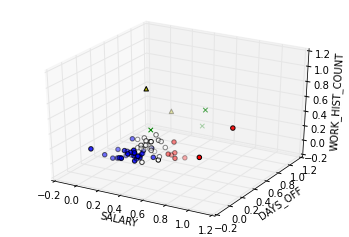

In [34]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

survey_df_c3b = survey_df_normalized.copy()[['SALARY', 'DAYS_OFF', 'WORK_HIST_COUNT']]
survey_df_c3b.insert(0, 'CLUSTER3_LABEL', kmeans.labels_)
cl3b_groups = survey_df_c3b.groupby(['CLUSTER3_LABEL'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cl3b_groups.get_group(0)['SALARY'].tolist(), 
           cl3b_groups.get_group(0)['DAYS_OFF'].tolist(), 
           cl3b_groups.get_group(0)['WORK_HIST_COUNT'].tolist(), 
           c='r', marker='o')
ax.scatter(cl3b_groups.get_group(1)['SALARY'].tolist(), 
           cl3b_groups.get_group(1)['DAYS_OFF'].tolist(), 
           cl3b_groups.get_group(1)['WORK_HIST_COUNT'].tolist(), 
           c='b', marker='o')
ax.scatter(cl3b_groups.get_group(2)['SALARY'].tolist(), 
           cl3b_groups.get_group(2)['DAYS_OFF'].tolist(), 
           cl3b_groups.get_group(2)['WORK_HIST_COUNT'].tolist(), 
           c='y', marker='^')
ax.scatter(cl3b_groups.get_group(3)['SALARY'].tolist(), 
           cl3b_groups.get_group(3)['DAYS_OFF'].tolist(), 
           cl3b_groups.get_group(3)['WORK_HIST_COUNT'].tolist(), 
           c='g', marker='x')
ax.scatter(cl3b_groups.get_group(4)['SALARY'].tolist(), 
           cl3b_groups.get_group(4)['DAYS_OFF'].tolist(), 
           cl3b_groups.get_group(4)['WORK_HIST_COUNT'].tolist(), 
           c='w', marker='o')

ax.set_xlabel('SALARY')
ax.set_ylabel('DAYS_OFF')
ax.set_zlabel('WORK_HIST_COUNT')

plt.show()


### Question 4: Of the features we have, what are the important features in this dataset when it comes to determining salary? How do I predict salary using a decision tree?

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

y = survey_df_raw["SALARY"]
X = survey_df_raw.drop(["SALARY", "STACK"], axis=1, inplace=False)
tree = DecisionTreeClassifier(min_samples_split=4)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

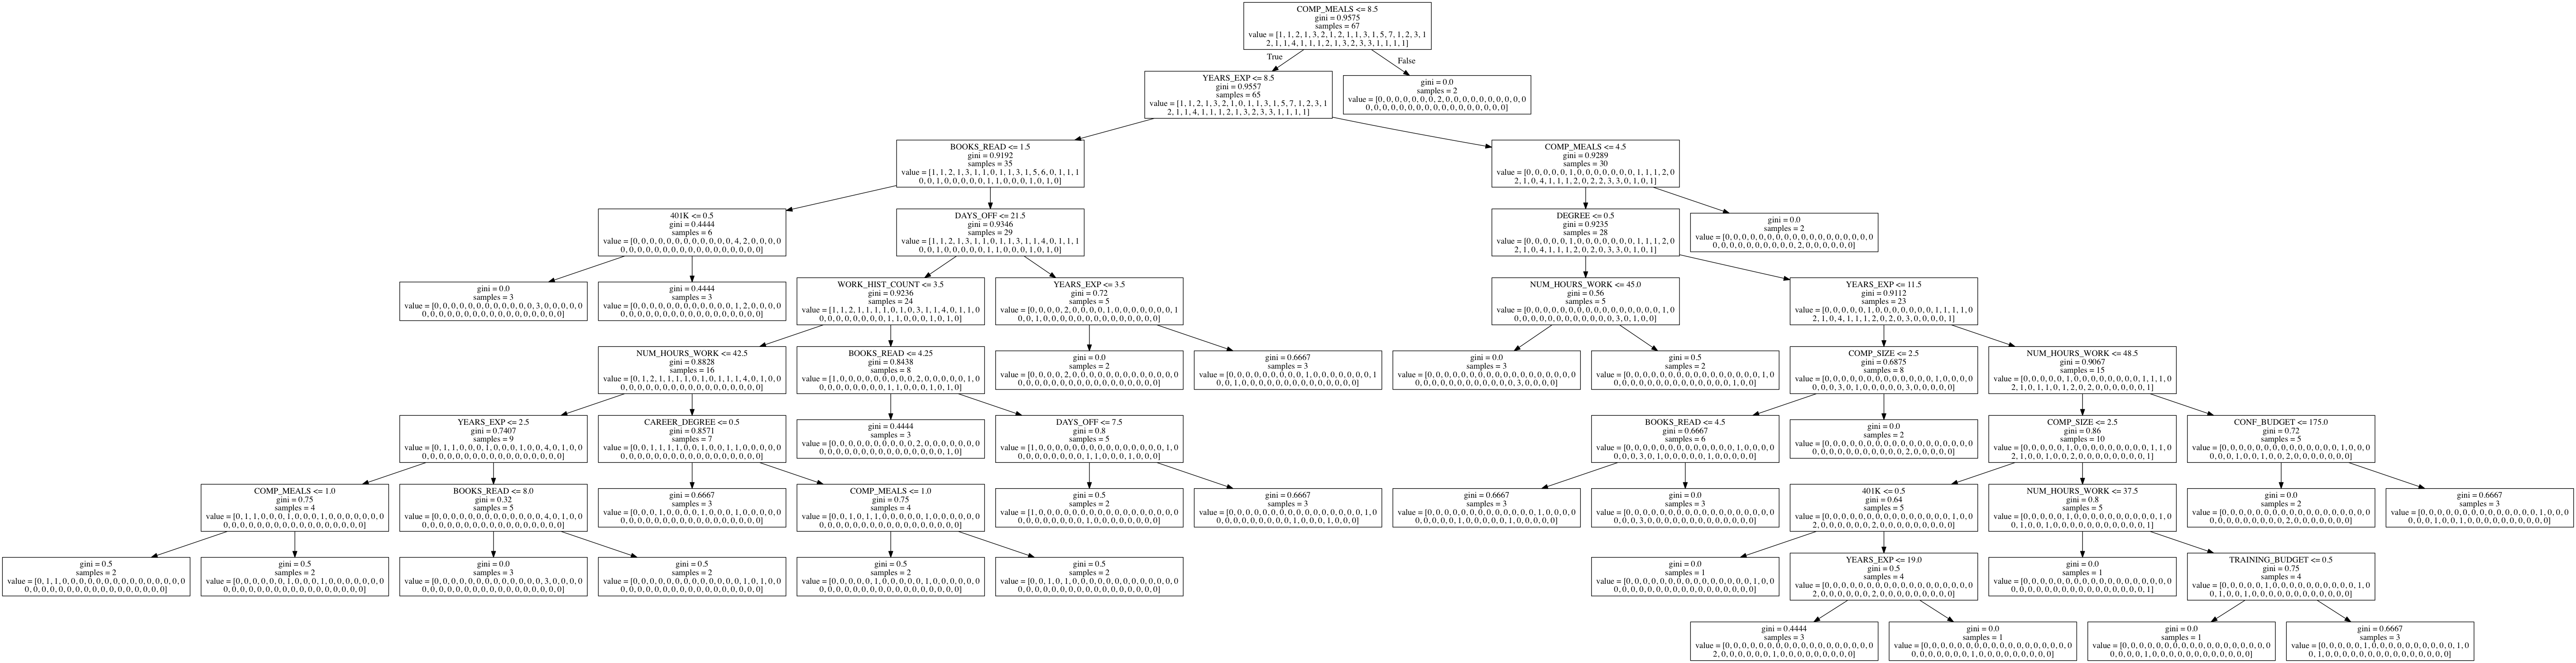

In [36]:
from os import system
from IPython.display import Image

with open('tree.dot', 'w') as dotfile:
    export_graphviz(tree, dotfile, feature_names=X.columns)

system("dot -Tpng tree.dot -o tree.png")
Image(filename='tree.png')